In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

In [44]:
df = pd.read_csv("/Users/marchen/Desktop/programming/AI/Fourth week/file/breast_cancer.csv", index_col=0)

In [45]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [46]:
# 칼럼명 확인
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

Text(0.5, 1.0, 'Label')

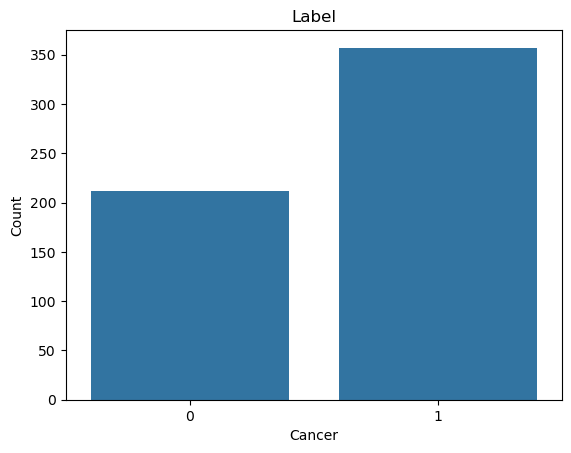

In [47]:
# 레이블 갯수 그래프
sns.countplot(data = df, x="label")
plt.xlabel("Cancer")
plt.ylabel("Count")
plt.title("Label")

In [48]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [49]:
# 결측치
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [50]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

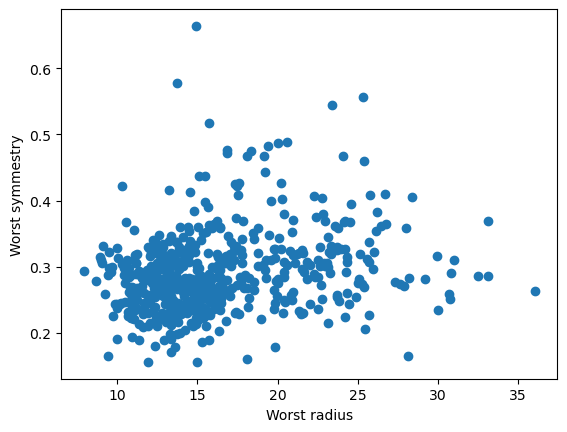

In [51]:
# 산점도 확인

plt.scatter(df['worst radius'], df['worst symmetry'])
plt.xlabel('Worst radius')
plt.ylabel('Worst symmestry')

plt.show()

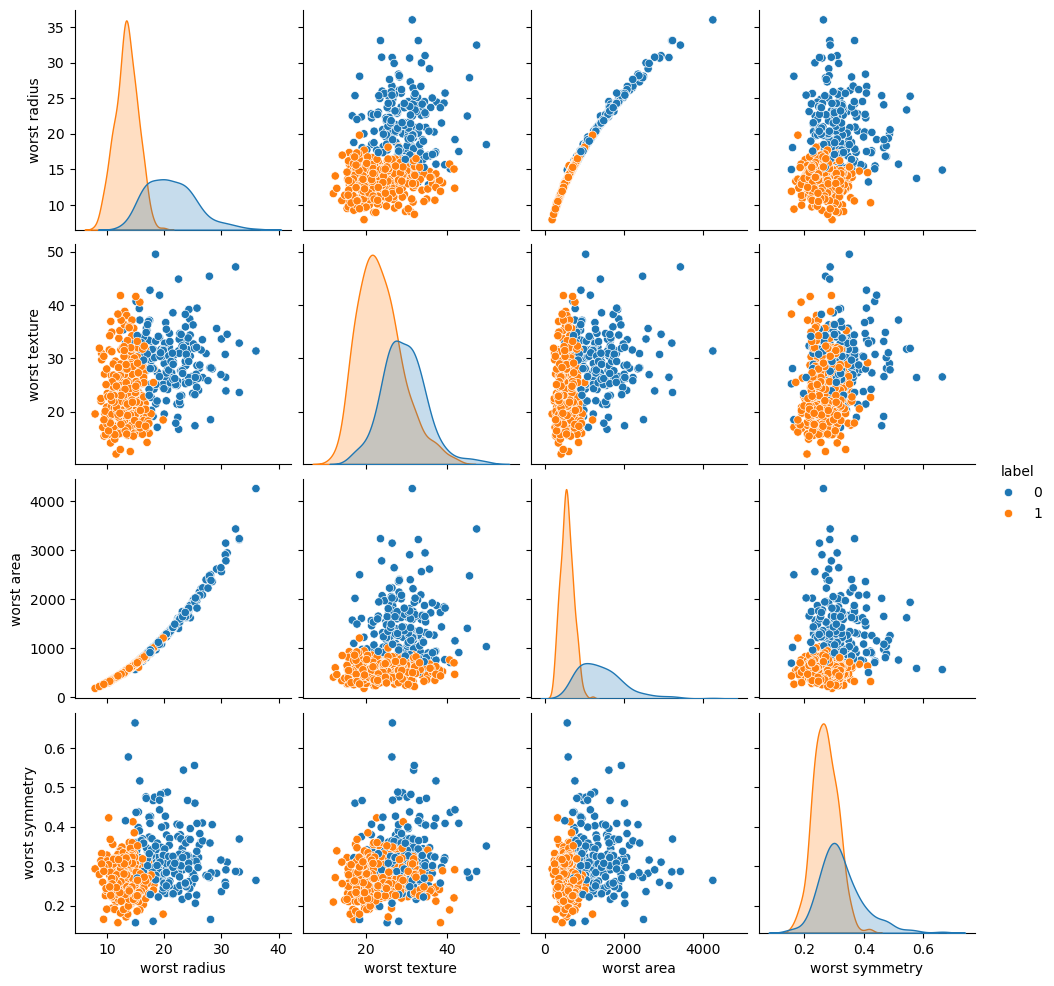

In [52]:
sns.pairplot(df, vars = ['worst radius', 'worst texture', 'worst area', 'worst symmetry'], hue = 'label')
plt.show()

/var/folders/5q/chb22dfn5hjb588_165l8lkr0000gn/T/ipykernel_83289/1344495084.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="worst radius", data=df, palette="Set3")


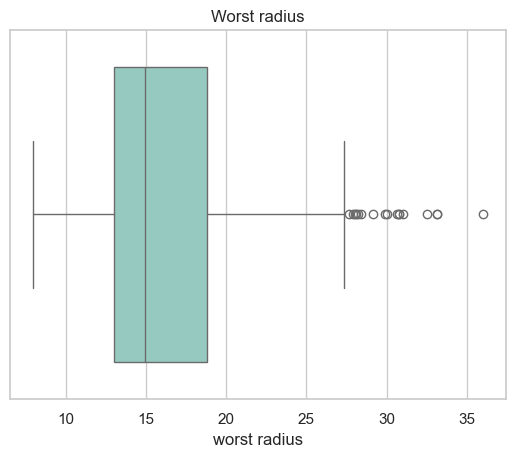

In [68]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="worst radius", data=df, palette="Set3")
plt.title("Worst radius")
plt.show()

/var/folders/5q/chb22dfn5hjb588_165l8lkr0000gn/T/ipykernel_83289/2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


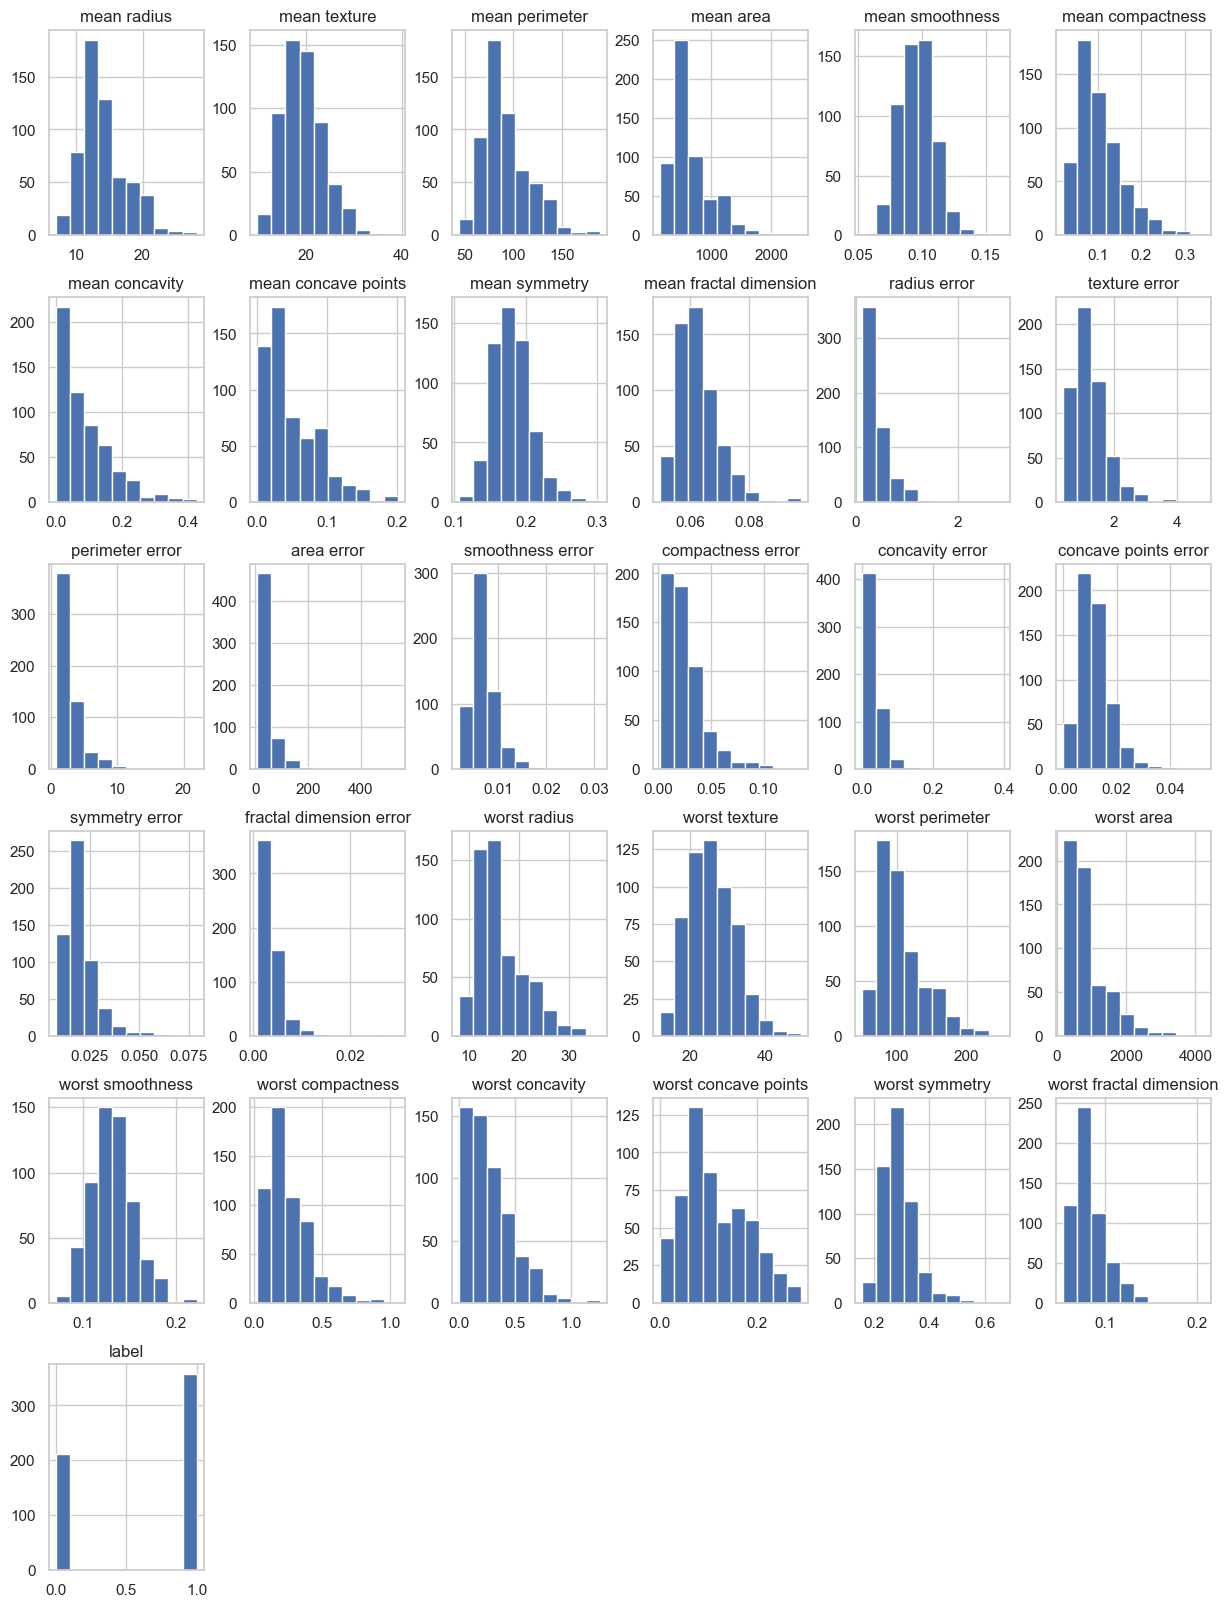

In [69]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [53]:
X = df.drop('label', axis = 1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
y = df['label']
y.value_counts()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## 원-핫 인코딩

In [55]:
# 원-핫 인코딩

Y = pd.get_dummies(y).values
X = X.values

## 딥러닝을 위해 Numpy로 변환

In [56]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [57]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

In [58]:
Y # 0,1을 주로 사용하지만 특정 상황이나 설정에 따라 True, False로 표현된다.

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [ True, False],
       [False,  True]])

In [59]:
# train, test 분류
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 40)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398, 2)
(171, 30) (171, 2)


# 머신 러닝

In [60]:
# DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# DT 모델 학습
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = dt_model.predict(X_test)
DT_accuracy = accuracy_score(y_test, y_pred)
print(f"DT  예측값 \n{y_pred[:5]}")
print(f"\nDT  정확도 : {DT_accuracy : .4f}")

DT  예측값 
[[False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]]

DT  정확도 :  0.9532


In [61]:
# RF
from sklearn.ensemble import RandomForestClassifier

# RF 모델 학습
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred)
print(f"RF  예측값 \n{y_pred[:5]}")
print(f"\nRF  정확도 : {RF_accuracy : .4f}")

RF  예측값 
[[False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]]

RF  정확도 :  0.9825


In [62]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 학습
knn_model = KNeighborsClassifier(n_neighbors=5)  # k값을 5로 설정
knn_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)

print(f"KNN 예측값 \n{y_pred[:5]}")
print(f"\nKNN 정확도 : {knn_accuracy:.4f}")

KNN 예측값 
[[False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]]

KNN 정확도 : 0.9415


## SVM과 LF는 다중 출력, 즉 2차원 배열을 지원하지 않아 OneVsRestClassifier을 이용하면 원-핫 인코딩에서 사용 가능하다.

In [64]:
# SVM
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# OneVsRestClassifier + SVM 모델 생성 및 학습
ovr_svm_model = OneVsRestClassifier(SVC())
ovr_svm_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_svm = ovr_svm_model.predict(X_test)
SVM_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"OneVsRest SVM 예측값 \n{y_pred[:5]}")
print(f"\nOneVsRest SVM 정확도 : {SVM_accuracy:.4f}")

OneVsRest SVM 예측값 
[[False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]]

OneVsRest SVM 정확도 : 0.9298


In [67]:
# LF
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# OneVsRestClassifier + Logistic Regression 모델 생성 및 학습
ovr_lr_model = OneVsRestClassifier(LogisticRegression(max_iter=10000))
ovr_lr_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_lr = ovr_lr_model.predict(X_test)
LF_accuracy = accuracy_score(y_test, y_pred_lr)

print(f"OneVsRest LR 예측값 \n{y_pred[:5]}")
print(f"\nOneVsRest LR 정확도 : {LF_accuracy:.4f}")

OneVsRest LR 예측값 
[[False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]]

OneVsRest LR 정확도 : 0.9649


# 딥러닝

In [72]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(30,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466 (1.82 KB)

 Trainable params: 466 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5342 - loss: 33.6340 - val_accuracy: 0.3275 - val_loss: 5.9136
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5127 - loss: 2.3410 - val_accuracy: 0.6725 - val_loss: 0.6730
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6045 - loss: 0.6795 - val_accuracy: 0.6725 - val_loss: 0.6567
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6164 - loss: 0.6698 - val_accuracy: 0.6725 - val_loss: 0.6460
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6215 - loss: 0.6611 - val_accuracy: 0.6725 - val_loss: 0.6368
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5930 - loss: 0.6688 - val_accuracy: 0.6725 - val_loss: 0.6326
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6195 - loss: 0.6561 - val_accuracy: 0.6725 - val_loss: 0.6307
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5964 - loss: 0.6634 - val_accuracy: 0.6725 - val_los

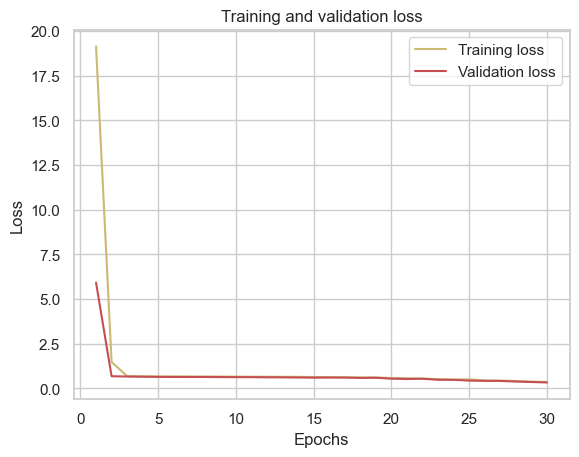

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

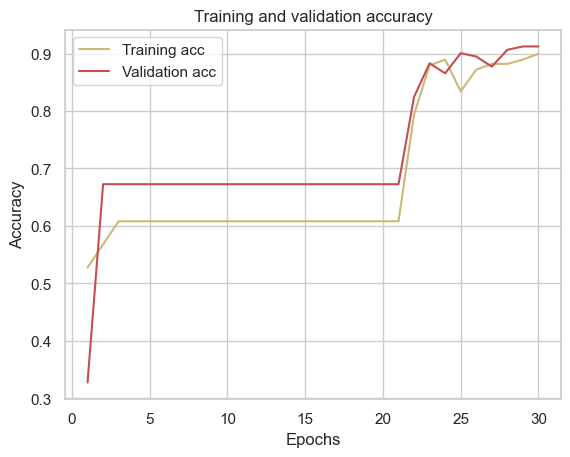

In [75]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [76]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        56
           1       0.89      0.99      0.94       115

    accuracy                           0.91       171
   macro avg       0.93      0.87      0.89       171
weighted avg       0.92      0.91      0.91       171

[[ 42  14]
 [  1 114]]
